### Import

In [1]:
from qutip import *
from qutip.operators import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from cython import *
from sympy import lambdify

### without RWA

In [53]:
Eq = 1
f = 0.3
def Hq():
    return Eq/2 *sigmaz()
def Hf():
    return f*sigmax()
def collapse_list():
    return []
Hf_time_coeff = "0.5*(tanh((t-a)/st) - tanh((t-b)/st))*cos(w*t + phase1) + 0.5*(tanh((t-a2)/st) - tanh((t-b2)/st))*cos(w*t + phase2)"
a = 33
b = 166
st = 0.1
phase1 = np.pi
phase2 = np.pi/2+np.pi/2
a2 = 210
b2 = 310
args = {'w':Eq, 'phase1':phase1, 'phase2':phase2,'a':a,'b':b,'st':st,'a2':a2,'b2':b2}
tlist = np.linspace(0,400,4000)
psi0 = (basis(2,0) + basis(2,1))/(2**0.5)

def Hq_t():
    return [Hq(),[Hf(),Hf_time_coeff]]

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


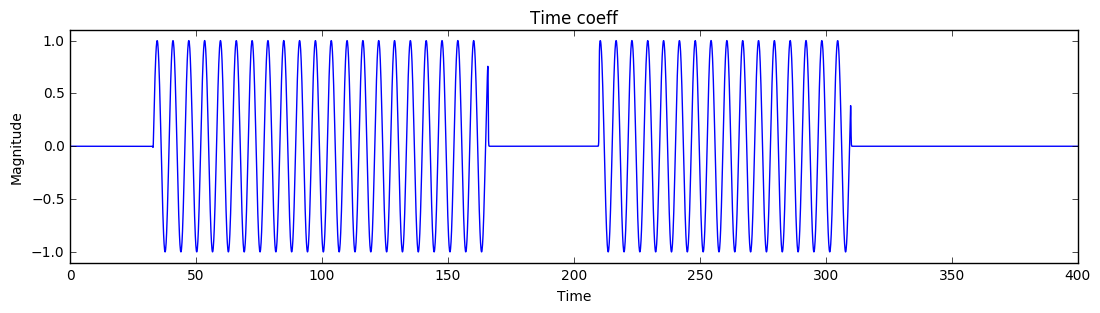

In [54]:
time_c_func = lambdify({'a','b','st','t','w','phase1','phase2','a2','b2'},Hf_time_coeff,'numpy')
fig, ax = plt.subplots(1,1, figsize=(13,3))
ax.set_title('Time coeff');
ax.plot(tlist, time_c_func(a=a,b=b,st=st,t=tlist,w=Eq,phase1=phase1,phase2=phase2,a2=a2,b2=b2))
ax.set_ylim(-1.1,1.1)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Magnitude');

In [40]:
expected = [Hq()]
def solve(expected_ops = expected, with_progress_bar = True):
    if with_progress_bar:
        return mesolve(Hq_t(), psi0, tlist, collapse_list(), expected_ops, args = args,options= Options(nsteps=10000), progress_bar=True)
    else:
        return mesolve(Hq_t(), psi0, tlist, collapse_list(), expected_ops, args = args,options= Options(nsteps=10000))

In [55]:
expected = [Hq()]
evecs = [basis(2,0),basis(2,1)]
for i in range(len(evecs)):
    expected.append(evecs[i]*evecs[i].dag())
    
output = solve(expected)

10.0%. Run time:   0.18s. Est. time left: 00:00:00:01
20.0%. Run time:   0.39s. Est. time left: 00:00:00:01
30.0%. Run time:   0.66s. Est. time left: 00:00:00:01
40.0%. Run time:   0.88s. Est. time left: 00:00:00:01
50.0%. Run time:   1.14s. Est. time left: 00:00:00:01
60.0%. Run time:   1.36s. Est. time left: 00:00:00:00
70.0%. Run time:   1.57s. Est. time left: 00:00:00:00
80.0%. Run time:   1.79s. Est. time left: 00:00:00:00
90.0%. Run time:   2.03s. Est. time left: 00:00:00:00
Total run time:   2.23s


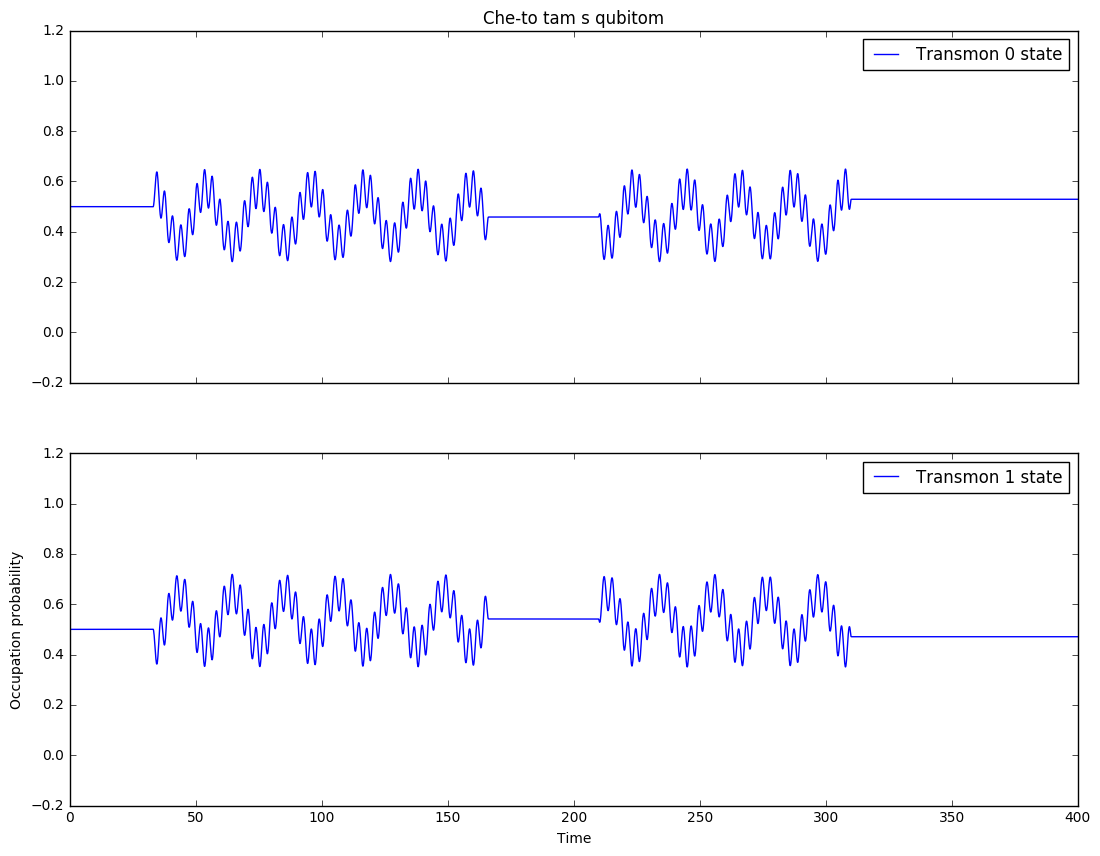

In [56]:
fig, axes = plt.subplots(2,1, figsize=(13,10), sharex=True)
axes[0].set_title('Che-to tam s qubitom');
for idx, ax in enumerate(axes):
    ax.plot(tlist, output.expect[1+idx], label="Transmon %i state"%idx)
    ax.set_ylim(-0.2,1.2)
    ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')